**This Compares results from docking to known actives and inactives**

### Importing Files

In [16]:
import pandas as pd
path_active= 'docking_results_ranked_actives.csv'
path_inactive= 'docking_results_ranked_inactives.csv'
path_docked = 'docking_results_ranked_docked.csv'

actives = pd.read_csv(path_active)
inactives = pd.read_csv(path_inactive)
docked = pd.read_csv(path_docked)

In [17]:
# column names
print(docked.columns)

Index(['Rank', 'Compound', 'SMILES', 'Affinity_kcal_per_mol', 'DLG_file',
       'Within_Pocket'],
      dtype='object')


### Filter outside the box

In [18]:
before = len(actives)
actives = actives[actives['Within_Pocket'] == True]
after = len(actives)
print(f"Number of actives before: {before}, after: {after}")

before = len(inactives)
inactives = inactives[inactives['Within_Pocket'] == True]
after = len(inactives)
print(f"Number of inactives before: {before}, after: {after}")

before = len(docked)
docked = docked[docked['Within_Pocket'] == True]
after = len(docked)
print(f"Number of docked before: {before}, after: {after}")

Number of actives before: 36, after: 33
Number of inactives before: 19, after: 19
Number of docked before: 43274, after: 34863


### Comparing Data

In [19]:
def calculate_energy_statistics(df):
    """
    Calculate the mean, median, min, max and standard deviation of the docking scores.
    """
    mean_score = df['Affinity_kcal_per_mol'].mean()
    median_score = df['Affinity_kcal_per_mol'].median()
    min_score = df['Affinity_kcal_per_mol'].min()
    max_score = df['Affinity_kcal_per_mol'].max()
    std_score = df['Affinity_kcal_per_mol'].std()
    return {
        'mean': mean_score,
        'median': median_score,
        'min': min_score,
        'max': max_score,
        'std': std_score
    }
top_100_docked = docked.head(100)
stat_docked_top_100 = calculate_energy_statistics(top_100_docked)
stat_actives = calculate_energy_statistics(actives)
stat_inactives = calculate_energy_statistics(inactives)
print("Docked Statistics (Top 100):")
print(stat_docked_top_100)
print("\nActives Statistics:")
print(stat_actives)
print("\nInactives Statistics:")
print(stat_inactives)


Docked Statistics (Top 100):
{'mean': -10.796599999999996, 'median': -10.745000000000001, 'min': -11.53, 'max': -10.57, 'std': 0.18128731590790037}

Actives Statistics:
{'mean': -9.17090909090909, 'median': -9.23, 'min': -10.49, 'max': -8.19, 'std': 0.653439762125992}

Inactives Statistics:
{'mean': -8.397894736842106, 'median': -8.42, 'min': -9.92, 'max': -6.43, 'std': 0.9129596495121933}


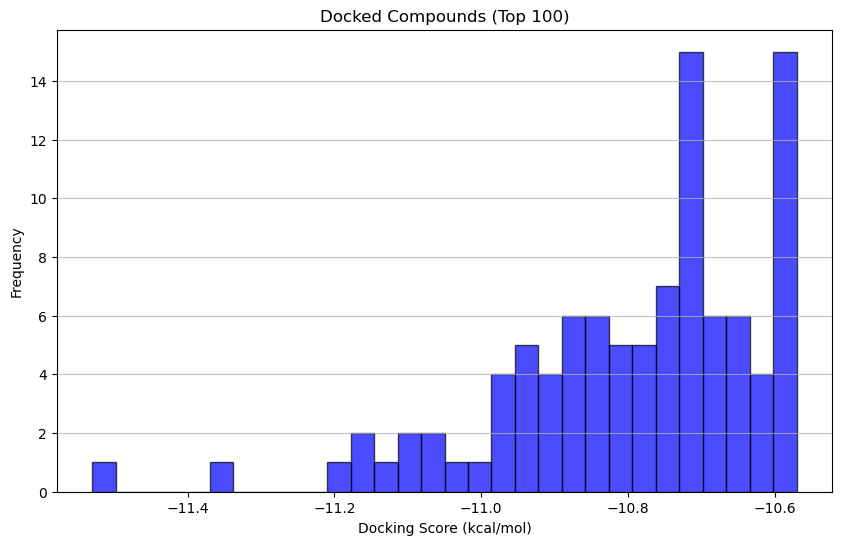

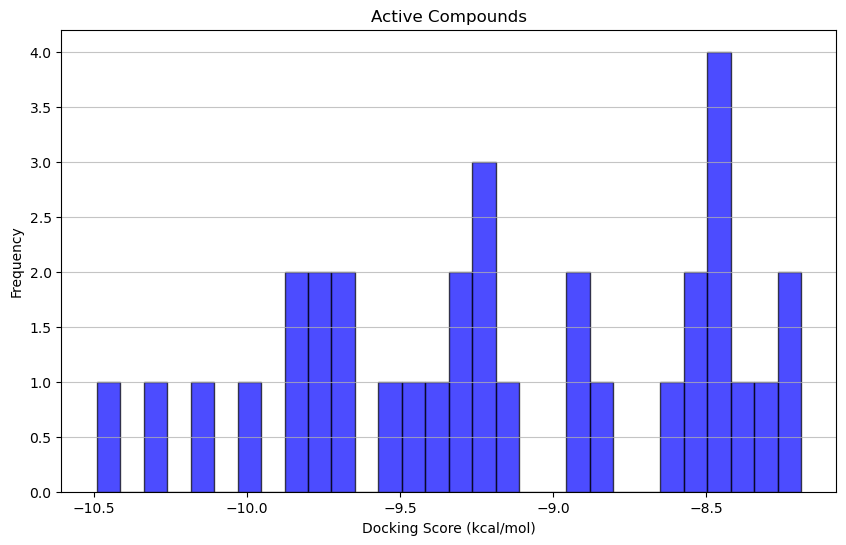

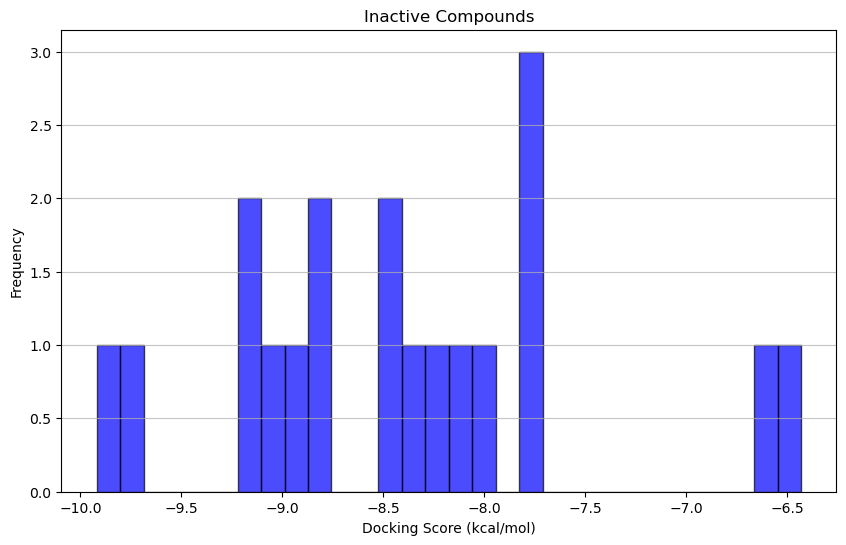

In [20]:
# Visualize Scores
import matplotlib.pyplot as plt
def plot_scores(df, title):
    """
    Plot the docking scores as a histogram.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(df['Affinity_kcal_per_mol'], bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Docking Score (kcal/mol)')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
plot_scores(top_100_docked, 'Docked Compounds (Top 100)')
plot_scores(actives, 'Active Compounds')
plot_scores(inactives, 'Inactive Compounds')

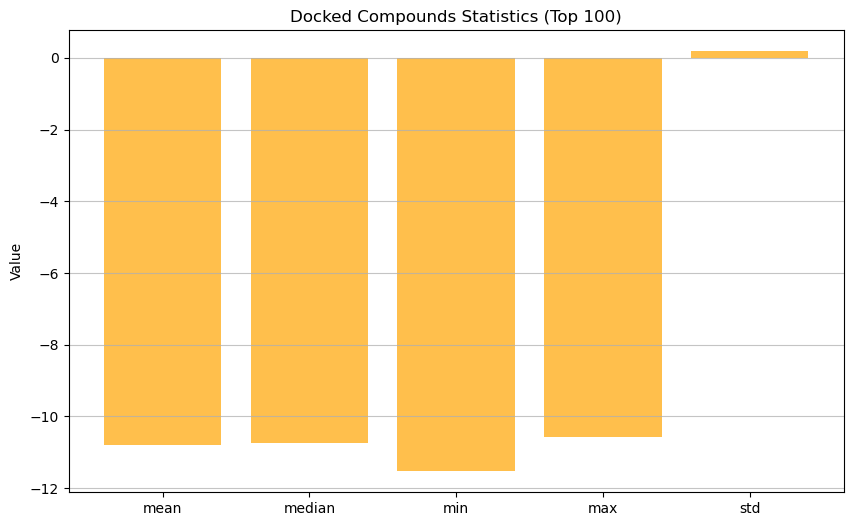

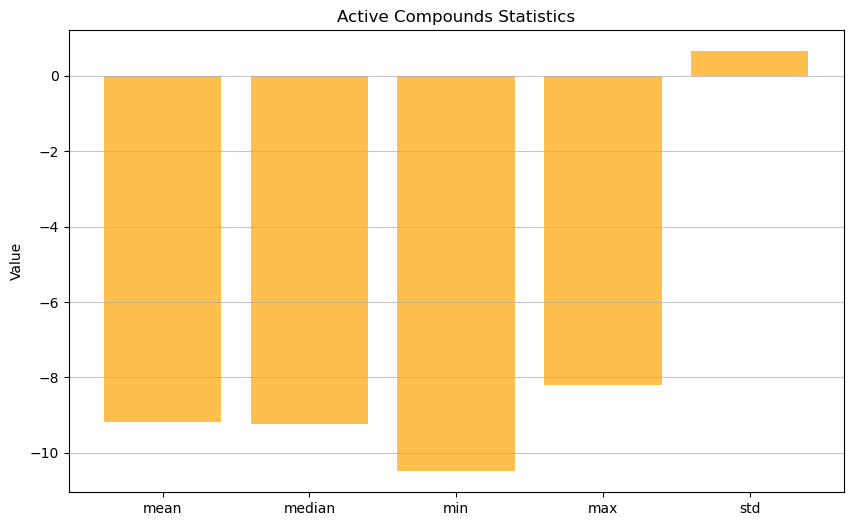

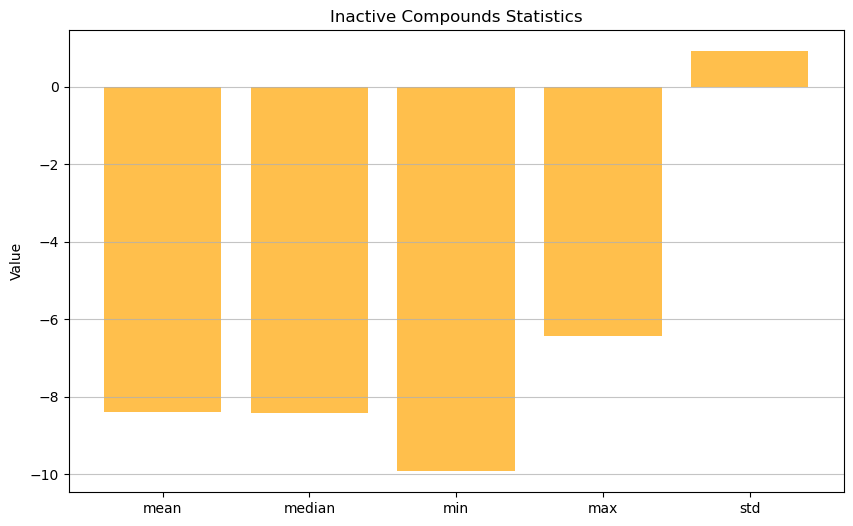

In [21]:
# Visualize Statistics
def plot_statistics(statistics, title):
    """
    Plot the statistics as a bar chart.
    """
    labels = list(statistics.keys())
    values = list(statistics.values())
    
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='orange', alpha=0.7)
    plt.title(title)
    plt.ylabel('Value')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
plot_statistics(stat_docked_top_100, 'Docked Compounds Statistics (Top 100)')
plot_statistics(stat_actives, 'Active Compounds Statistics')
plot_statistics(stat_inactives, 'Inactive Compounds Statistics')

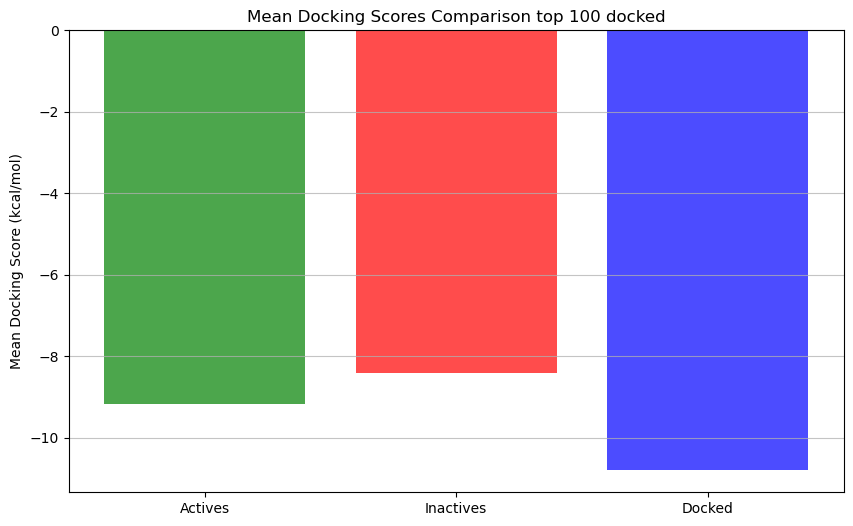

In [22]:
# visualzie mean for actives and inactives and docked
def plot_mean_comparison(actives_mean, inactives_mean, docked_mean, title):
    """
    Plot the mean docking scores for actives, inactives, and docked compounds.
    """
    means = [actives_mean, inactives_mean, docked_mean]
    labels = ['Actives', 'Inactives', 'Docked']
    title = title if title else 'Mean Docking Scores Comparison'
    plt.figure(figsize=(10, 6))
    plt.bar(labels, means, color=['green', 'red', 'blue'], alpha=0.7)
    plt.title(title)
    plt.ylabel('Mean Docking Score (kcal/mol)')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
actives_mean = stat_actives['mean']
inactives_mean = stat_inactives['mean']
docked_mean_top_100 = stat_docked_top_100['mean']
plot_mean_comparison(actives_mean, inactives_mean, docked_mean_top_100, title = 'Mean Docking Scores Comparison top 100 docked') 


Docked Statistics (Top 1000):
{'mean': -10.13524, 'median': -10.06, 'min': -11.53, 'max': -9.79, 'std': 0.2942807223444029}


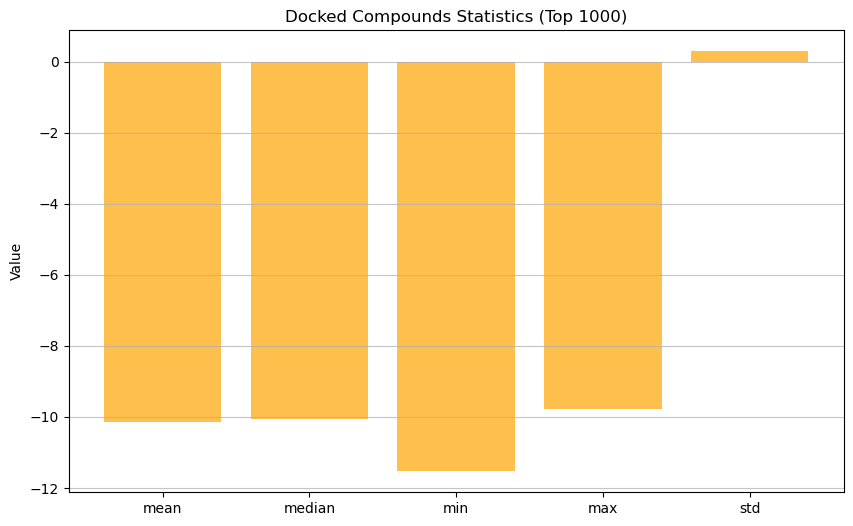

In [23]:
top_1k_docked = docked.head(1000)
stat_top_1k_docked = calculate_energy_statistics(top_1k_docked)
print("\nDocked Statistics (Top 1000):")
print(stat_top_1k_docked)
plot_statistics(stat_top_1k_docked, 'Docked Compounds Statistics (Top 1000)')

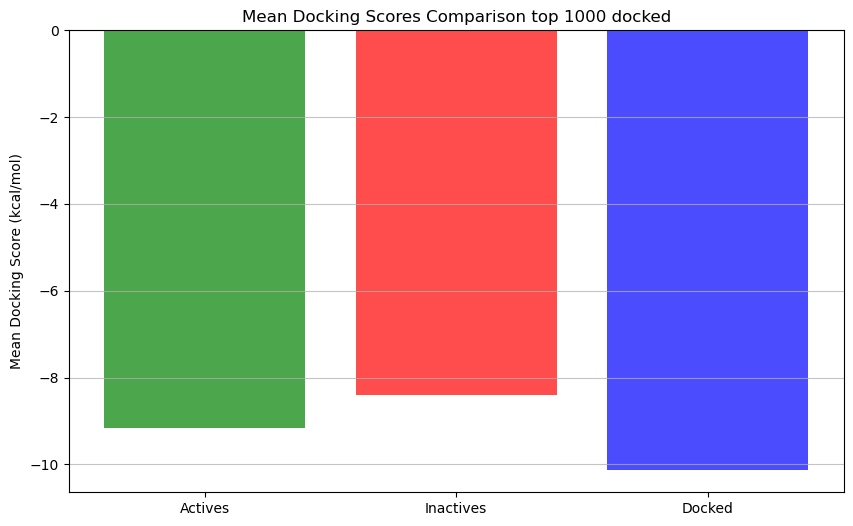

In [24]:
docked_1k_mean = stat_top_1k_docked['mean']
plot_mean_comparison(actives_mean, inactives_mean, docked_1k_mean, title='Mean Docking Scores Comparison top 1000 docked')


Docked Statistics (Bottom 1000):
{'mean': -5.46593, 'median': -5.555, 'min': -5.85, 'max': -4.22, 'std': 0.3161371186333199}


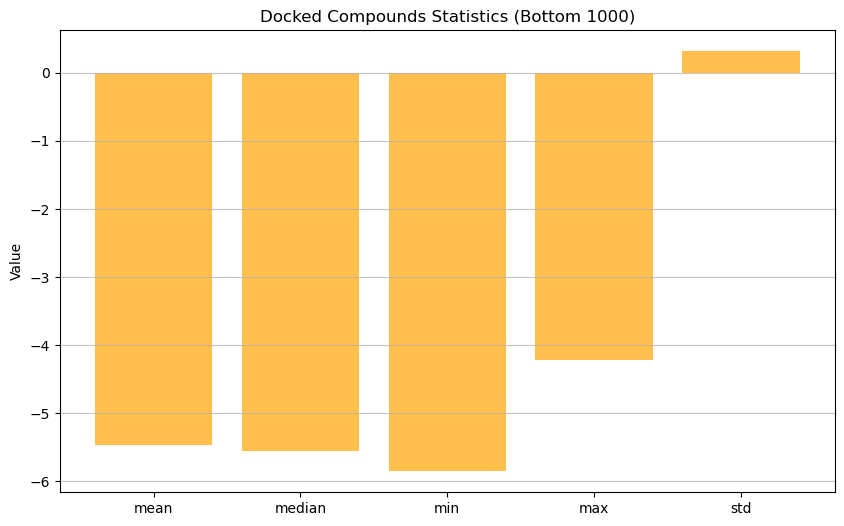

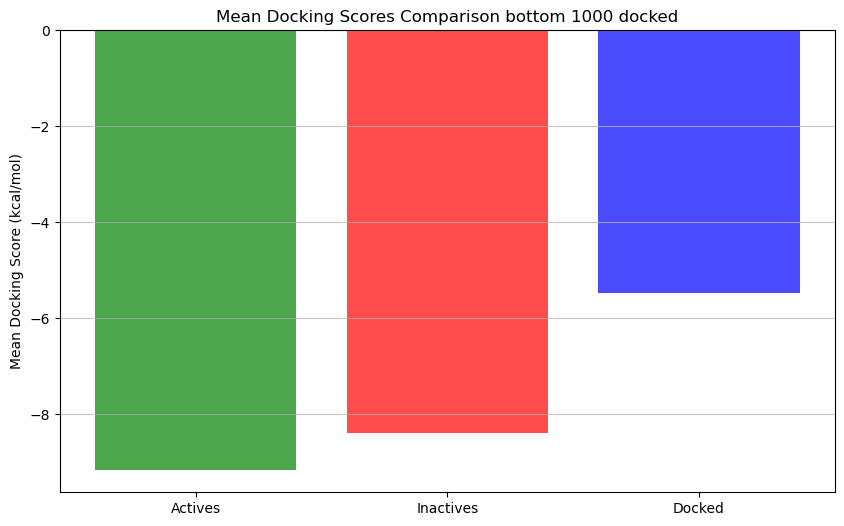

In [25]:
docked_bottom_1k = docked.tail(1000)
stat_bottom_1k_docked = calculate_energy_statistics(docked_bottom_1k)
print("\nDocked Statistics (Bottom 1000):")
print(stat_bottom_1k_docked)
plot_statistics(stat_bottom_1k_docked, 'Docked Compounds Statistics (Bottom 1000)') 
docked_bottom_1k_mean = stat_bottom_1k_docked['mean']
plot_mean_comparison(actives_mean, inactives_mean, docked_bottom_1k_mean, title='Mean Docking Scores Comparison bottom 1000 docked')


Overall Docked Mean Score:
-7.886773083211428


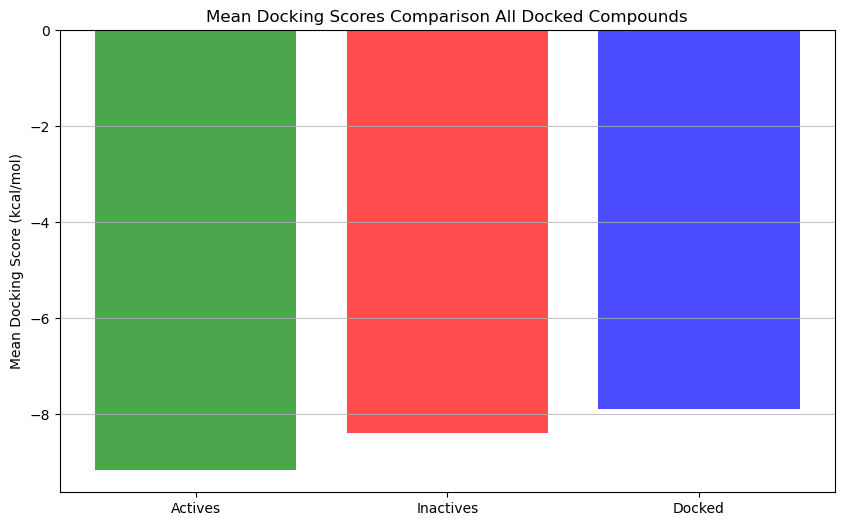

In [26]:
all_docked = docked['Affinity_kcal_per_mol']
all_docked_mean = all_docked.mean()
print("\nOverall Docked Mean Score:")   
print(all_docked_mean)
plot_mean_comparison(actives_mean, inactives_mean, all_docked_mean, title='Mean Docking Scores Comparison All Docked Compounds')


Decoys Statistics:
{'mean': -6.858380462724935, 'median': -6.83, 'min': -9.94, 'max': -3.26, 'std': 1.0592409747096783}


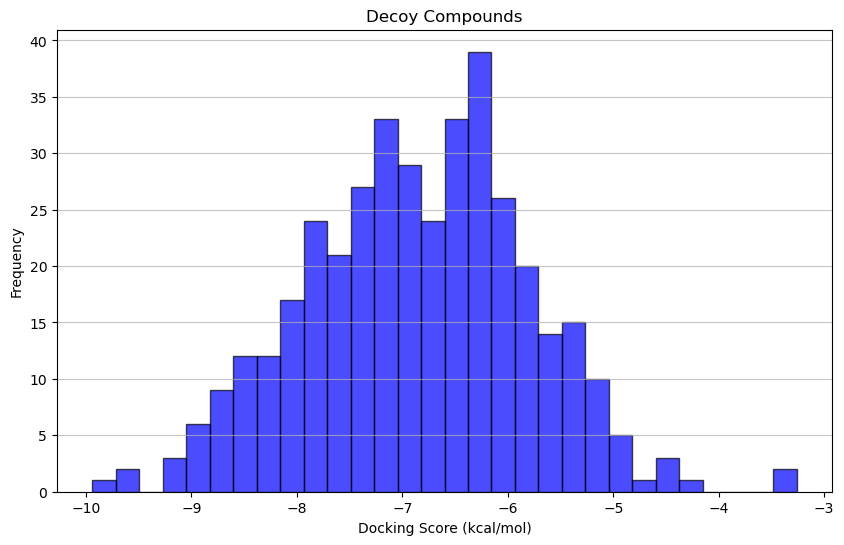

In [35]:
# decoys data
path_decoys = 'docking_results_ranked_decoys.csv'
decoys = pd.read_csv(path_decoys)
# Filter decoys within the pocket
decoys = decoys[decoys['Within_Pocket'] == True]
# Calculate statistics for decoys
stat_decoys = calculate_energy_statistics(decoys)
print("\nDecoys Statistics:")
print(stat_decoys)
# Visualize Decoys Scores
plot_scores(decoys, 'Decoy Compounds')
# Visualize Decoys Statistics

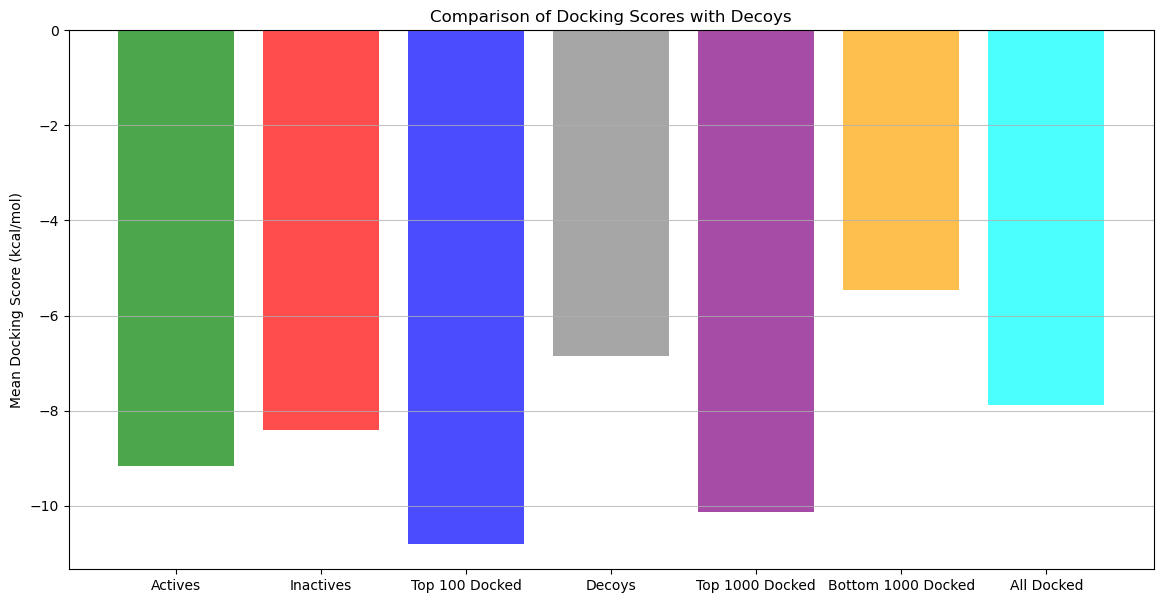

In [38]:
def compare_all_scores_mean(actives, inactives, top_100, top_1k, bottom_1k, all_docked, decoys=None):
    """
    Compare the docking scores of actives, inactives, top 100 docked, top 1000 docked, bottom 1000 docked, all docked compounds, and decoys (as 4th column if provided).
    """
    means = [
        actives['Affinity_kcal_per_mol'].mean(),
        inactives['Affinity_kcal_per_mol'].mean(),
        top_100['Affinity_kcal_per_mol'].mean(),
    ]
    labels = ['Actives', 'Inactives', 'Top 100 Docked']
    colors = ['green', 'red', 'blue']

    if decoys is not None:
        means.append(decoys['Affinity_kcal_per_mol'].mean())
        labels.append('Decoys')
        colors.append('grey')

    means += [
        top_1k['Affinity_kcal_per_mol'].mean(),
        bottom_1k['Affinity_kcal_per_mol'].mean(),
        all_docked.mean()
    ]
    labels += ['Top 1000 Docked', 'Bottom 1000 Docked', 'All Docked']
    colors += ['purple', 'orange', 'cyan']

    plt.figure(figsize=(14, 7))
    plt.bar(labels, means, color=colors, alpha=0.7)
    plt.title('Comparison of Docking Scores' + (' with Decoys' if decoys is not None else ''))
    plt.ylabel('Mean Docking Score (kcal/mol)')
    plt.grid(axis='y', alpha=0.75)
    plt.show()       
    
compare_all_scores_mean(actives, inactives, top_100_docked, top_1k_docked, docked_bottom_1k, all_docked, decoys=decoys)


### Find top 100 ligands that are closer to the mean of the actives

In [37]:
def find_top_n_closest_to_actives(docked_df, actives_mean, n=100):
    """
    Find the top n compounds from docked_df whose Affinity_kcal_per_mol scores are closest to actives_mean.
    Returns a DataFrame of the top n closest compounds.
    """
    docked_df = docked_df.copy()
    docked_df['distance_to_actives_mean'] = (docked_df['Affinity_kcal_per_mol'] - actives_mean).abs()
    closest_n = docked_df.nsmallest(n, 'distance_to_actives_mean').drop(columns=['distance_to_actives_mean'])
    return closest_n

top_100_closest_to_actives = find_top_n_closest_to_actives(docked, actives_mean, n=100)
top_100_closest_to_actives.head()
top_100_closest_to_actives.to_csv('closest_100_to_actives.csv', index=False)